In [2]:
import sys
sys.path.append('/mnt/archgen/users/yilei/IBDsim/downsample')
from plot_utility import calc_power_all, readMaskTrack
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import splev, splrep

##########################  examining coverage cov5  #############################
##########################  examining coverage cov2  #############################
##########################  examining coverage cov1  #############################
##########################  examining coverage cov3over4  #############################
##########################  examining coverage cov1over2  #############################


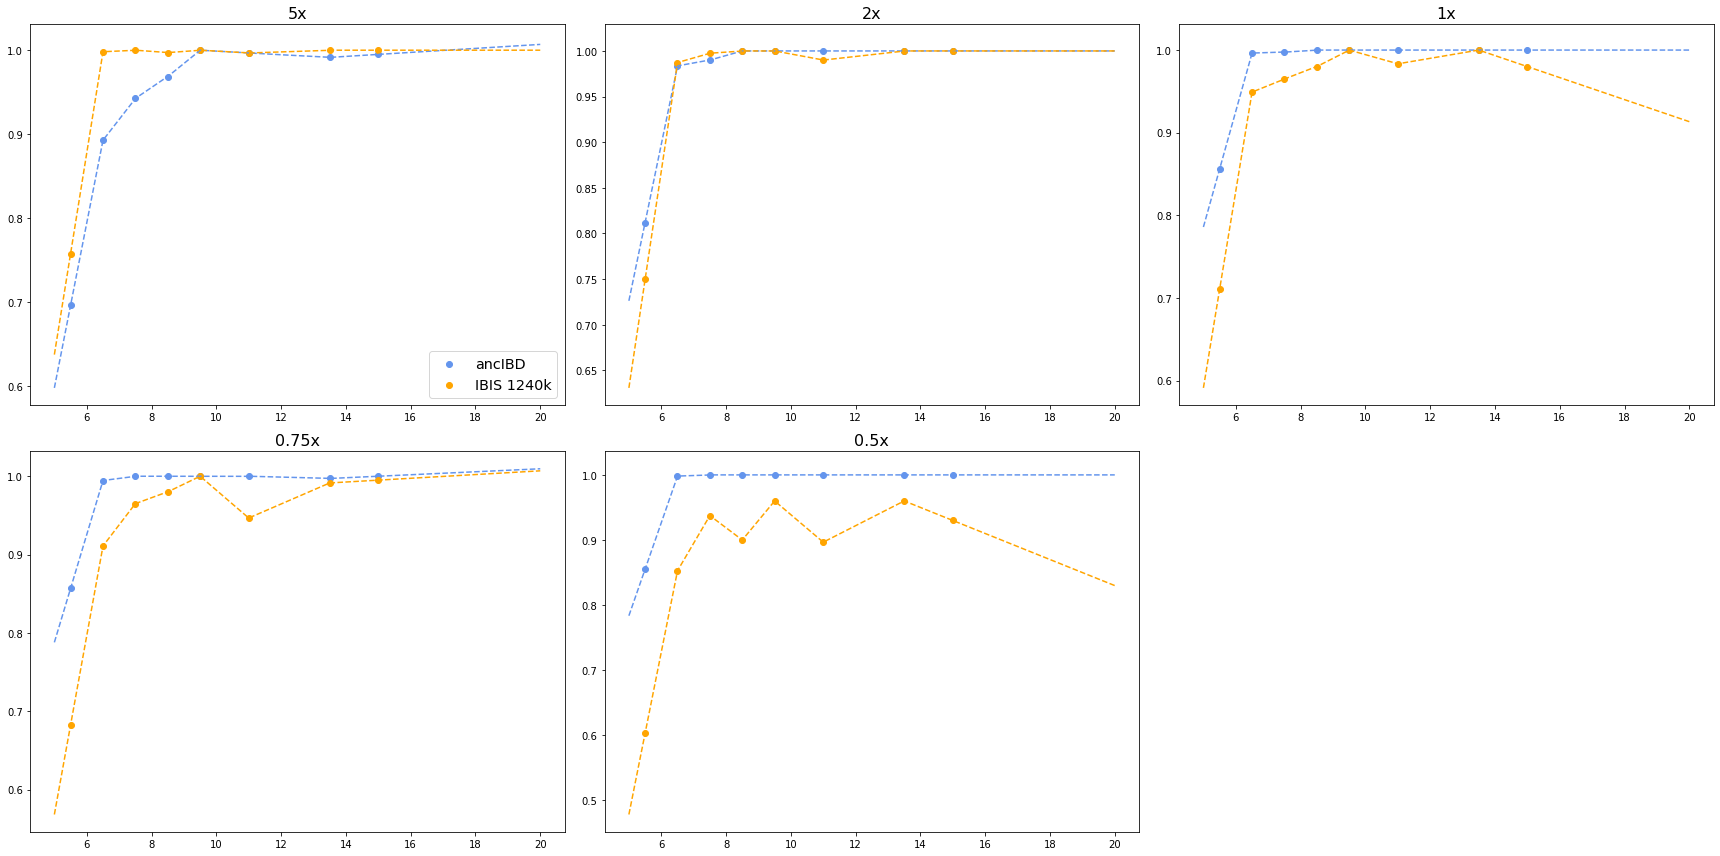

In [8]:
#bins = [(5,6), (6,8), (8,10), (10,15), (15, np.inf), (6,np.inf)]
covs = ['cov5', 'cov2', 'cov1', 'cov3over4', 'cov1over2']
cov2str = {'cov5':'5x', 'cov2':'2x', 'cov1':'1x', 'cov3over4':'0.75x', 'cov1over2':'0.5x'}
bins = [(5,5.5), (5.5,6), (6,6.5),(6.5,7),(7,7.5),(7.5,8),(8.5,9),(9,10),(10,12),(12,15),(15, np.inf)]
bins = [(5,6), (6,7), (7,8), (8,9),(9,10), (10,12),(12,15), (15,np.inf)]

masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only_masked.seg'
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(24, 12), tight_layout=True)

midpoint = [(bin[0] + bin[1])/2 for bin in bins]
midpoint[-1] = 15

for index, cov in enumerate(covs):
    i, j = index//3, index%3
    print(f'##########################  examining coverage {cov}  #############################')
    hapBLOCK = []
    ibis = []
    for bin in bins:
        power_hapBLOCK = calc_power_all(path2GroundTruth, f'../callIBD/{cov}', bin[0], bin[1], mode='hapBLOCK', masks=masks)
        power_ibis = calc_power_all(path2GroundTruth, f'../callIBD/{cov}', bin[0], bin[1], mode='IBIS_1240k', masks=masks)
        hapBLOCK.append(power_hapBLOCK)
        ibis.append(power_ibis)
    axs[i,j].scatter(midpoint, hapBLOCK, color='cornflowerblue', label='ancIBD')
    f = interpolate.interp1d(midpoint, hapBLOCK, fill_value="extrapolate")
    x2 = np.linspace(5, 20, 1000)
    y2 = f(x2)
    axs[i,j].plot(x2, y2, color='cornflowerblue', linestyle='--')
    axs[i,j].scatter(midpoint, ibis, color='orange', label='IBIS 1240k')
    f = interpolate.interp1d(midpoint, ibis, fill_value="extrapolate")
    x2 = np.linspace(5, 20, 1000)
    y2 = f(x2)
    axs[i,j].plot(x2, y2, color='orange', linestyle='--')

    if i == j == 0:
        axs[i,j].legend(loc='lower right', fontsize='x-large')
    axs[i,j].set_title(cov2str[cov], fontsize=16)
axs[-1, -1].axis('off')
plt.savefig(f'power_mask.png', dpi=300)